# Integrantes Grupo 2:
*   Diego Cheloni
*   Iván Ezequiel Fernandez
*   Jhon Alexander Ortiz
*   Jean Carlos Pita
*   Laura Gutierrez
*   María Pía Achigar
*   Pablo Romero Perez 

## Analisis de dataset
En esta notebook se encuentran todos los análisis realizados a las features resultantes de la etapa de ETL.

### Contenido:
* Análisis descriptivo: Resumen estadístico de las features.
* Análisis exploratorio: Visualización de la distribución de los datos.
* Análisis geoespacial: Visualización de datos en un mapa.

### Carga de dependencias
Importación de librerías necesarias para el proyecto

In [91]:
#Análisis
import pandas as pd
import geopandas as gpd
import re
import numpy as np

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns


Después de aplicar diversas estrategias en el proceso de Extracción, Transformación y Carga (ETL) de los datos, finalmente se obtuvo un DataFrame completo y listo para llevar a cabo análisis más detallados sobre el desperdicio de alimentos. Dicho DataFrame contiene las siguientes columnas esenciales:

- **country:** Nombre del país donde se recopilaron los datos.
- **alimento:** Descripción del producto.
- **year:** Año en que se recogieron los datos.
- **loss_percentage:** Porcentaje de pérdida del producto durante la etapa especificada, en forma decimal.
- **activity:** Actividad durante la cual se registró la pérdida.
- **food_supply_stage:** Etapa de la cadena de suministro de alimentos donde se registró la pérdida.
- **activity:** Actividad durante la cual se registró la pérdida.


In [92]:
# Cargar el dataset
df_food = pd.read_csv('data_food_clean.csv')
df_food.sample(5)


,country,commodity,year,loss_percentage,activity,food_supply_stage,month,periodo,frec_actividad_de_perdida,frec_etapa_de_perdida,frec_alimento
40180,Zimbabwe,wheat,2003-01-01,1.30000,shelling_threshing,whole_supply_chain,6,2003-06-01,5958,3414,3349
33999,United States of America,maize_corn,2022-01-01,3.24000,winnowing,transport,10,2022-10-01,2403,3506,9968
618,Cameroon,maize_corn,2018-01-01,4.00000,drying,farm,9,2018-09-01,1647,23186,9968
23291,United States of America,lemons_and_limes,2007-01-01,5.00000,storage,whole_supply_chain,6,2007-06-01,14546,3414,79
32512,Mali,wheat,2000-01-01,2.16667,drying_harvesting,farm,9,2000-09-01,6469,23186,3349


---

### Se copia el dataset para procesar en caso de que las conclusiones nos lleven a hacerlo

In [94]:
df_food_copy = df_food.copy()

# Análisis Descriptivo

In [95]:
numeric_summary = df_food.describe().round(2)

categorical_summary = df_food.describe(include=['object'])

print("\nResumen Estadístico de Features Numéricas:\n")
print(numeric_summary)

print("\nResumen Estadístico de Features Categóricas:\n")
for column in categorical_summary.columns:
    unique_values = categorical_summary[column]['unique']
    top_value = categorical_summary[column]['top']
    freq_value = categorical_summary[column]['freq']
    print(f"Feature: {column}")
    print(f"  Valores Únicos: {unique_values}")
    print(f"  Valor Más Frecuente: {top_value} (Frecuencia: {freq_value})")
    print()


Resumen Estadístico de Features Numéricas:

       loss_percentage     month  frec_actividad_de_perdida  \
count         45348.00  45348.00                   45348.00   
mean              4.24      6.51                    8656.94   
std               5.78      3.45                    4900.10   
min               0.00      1.00                       1.00   
25%               1.55      4.00                    5958.00   
50%               2.65      7.00                    9685.00   
75%               4.40     10.00                   14546.00   
max              65.00     12.00                   14546.00   

       frec_etapa_de_perdida  frec_alimento  
count               45348.00       45348.00  
mean                14165.58        5704.24  
std                  9351.63        3502.98  
min                     2.00           1.00  
25%                  5287.00        1721.00  
50%                 23186.00        6487.00  
75%                 23186.00        7867.00  
max                

## Conclusiones del Análisis Descriptivo

### Features Numéricas

1. **Porcentaje de Pérdida:**
* La media del porcentaje de pérdida es de aproximadamente 4.2%, con una desviación estándar de 5.8%. Esto indica que, en promedio, los productos tienen una pérdida del 4.2%, pero hay una variabilidad considerable en los datos.
* El valor máximo de pérdida es del 65%, lo cual es bastante alto, sugiriendo que hay algunos casos extremos de alta pérdida.
* El valor mínimo es muy cercano a cero, lo que indica que hay casos con pérdidas insignificantes.

2. **Frecuencia de Actividad de Pérdida:**
* La media de la frecuencia de actividad de pérdida es de aproximadamente 8657, con una desviación estándar de 4900. Esto sugiere que algunas actividades son reportadas con mucha más frecuencia que otras.
* La mediana es de 9685 y el rango amplio de frecuencias (de 1 a 14546) indican que hay actividades que son reportadas muy frecuentemente y otras muy raramente.

3. **Frecuencia de Etapa de Pérdida:**
* La media es de 14166, con una desviación estándar de 9351, lo que muestra una distribución muy dispersa de las frecuencias de las etapas.
* La mediana es de 23186, indicando que la mitad de las etapas de pérdida tienen frecuencias por encima de este valor, y la otra mitad por debajo.

4. **Frecuencia de Alimento:**
* La media es de 5704, con una desviación estándar de 3502, indicando una distribución también bastante dispersa.
* La mediana es de 6487 y el valor máximo de 9968 sugieren que ciertos alimentos son más propensos a ser reportados con respecto a la pérdida que otros.

### Features Categóricas

1. **País:**
* Los datos abarcan 123 países diferentes, lo que sugiere una cobertura geográfica amplia.
* El país con más reportes es Estados Unidos, con 2694 ocurrencias, lo que podría indicar un enfoque particular en la recolección de datos en este país.

2. **Alimento:**
* Hay 147 tipos diferentes de alimentos en el dataset, indicando una variedad considerable de productos analizados.
* El alimento más frecuentemente reportado es el maíz (maize_corn), con 9968 ocurrencias, lo que sugiere que el maíz es un alimento de interés particular en el estudio de pérdidas.
3. **Año:**
* Los datos cubren 23 años diferentes, siendo 2014 el año más frecuente e indicando que por ese entonces se habrían hecho esfuerzos significativos en la recolección de datos.

4. **Actividad de Pérdida:**
* Hay 127 actividades diferentes asociadas con la pérdida de alimentos.
* La actividad más frecuente es el almacenamiento (storage), con 14546 ocurrencias, sugiriendo que el almacenamiento es una etapa crítica para las pérdidas de alimentos.

5. **Etapa de Pérdida:**
* Las pérdidas se registran en 20 etapas diferentes de la cadena de suministro.
* La etapa más frecuente es la de la granja (farm), con 23186 ocurrencias, indicando que una gran parte de las pérdidas ocurre en la fase inicial de la producción.

### Conclusiones Generales:
- **Variabilidad y Distribución:** Hay una considerable variabilidad en los porcentajes de pérdida, con algunos productos y actividades mostrando tasas de pérdida significativamente mayores.
- **Puntos Críticos:** Almacenamiento y la etapa de la granja son áreas críticas donde se registran la mayoría de las pérdidas.
- **Cobertura y Enfoque:** El dataset cubre una amplia gama de países, alimentos y actividades, pero ciertos países y productos (como Estados Unidos y el maíz) son más representados en los datos.

---

# Análisis Exploratorio

In [96]:
# Configuración de estilo
sns.set_theme(style="whitegrid")

# Función para generar plot de evolución de pérdida de alimentos
def plot_evolucion_perdida_alimentos(df, columna_anio, columna_objetivo, titulo, xlabel, ylabel):
    loss_per_year = df.groupby(columna_anio)[columna_objetivo].mean()
    plt.figure(figsize=(12, 6))
    plt.plot(loss_per_year.index, loss_per_year.values, marker='o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(titulo)
    plt.grid(True)
    plt.show()


# Función para generar un histograma
def plot_histograma(df, columna, titulo, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[columna], bins=30, kde=True)
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


# Función para generar un boxplot
def plot_boxplot(df, x_col, y_col, titulo, xlabel, ylabel, top_n=None):
    plt.figure(figsize=(14, 8))
    if top_n:
        top_values = df[x_col].value_counts().index[:top_n]
        df = df[df[x_col].isin(top_values)]
    sns.boxplot(x=x_col, y=y_col, data=df)
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.show()

# Función para generar un gráfico de barras
def plot_bar(df, columna, titulo, xlabel, ylabel, top_n=None):
    plt.figure(figsize=(12, 6))
    counts = df[columna].value_counts()
    if top_n:
        counts = counts.head(top_n)
    sns.barplot(x=counts.values, y=counts.index, palette='viridis')
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Función para generar un diagrama de dispersión
def plot_scatter(df, x_col, y_col, hue_col, titulo, xlabel, ylabel):
    plt.figure(figsize=(12, 8))
    scatter_plot = sns.scatterplot(x=x_col, y=y_col, data=df, hue=hue_col, palette='tab10')
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(title=hue_col, bbox_to_anchor=(1.05, 1), loc='upper left')  # Mover la leyenda fuera de la gráfica
    plt.xticks(rotation=45)
    plt.show()

# Función para generar un gráfico de correlación
def generar_matriz_correlacion_focalizada(df, columna_objetivo, titulo):
    df_numerico = df.select_dtypes(include=['float64', 'int64'])

    if columna_objetivo not in df_numerico.columns:
        df_numerico[columna_objetivo] = df[columna_objetivo]
    
    corr_matrix = df_numerico.corr()
    
    corr_target = corr_matrix[[columna_objetivo]].sort_values(by=columna_objetivo, ascending=False)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_target, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title(titulo)
    plt.show()

# Función para homogeneizar variables categóricas
def clean_format_category(category):
    # Eliminar caracteres especiales usando re
    category = re.sub(r'[^\w\s]', '', category)
    # Convertir a minúsculas
    category = category.lower()
    # Reemplazar espacios en blanco por guiones bajos
    category = re.sub(r'\s+', '_', category)
    return category

# Función para eliminar outliers en variables numéricas mediante IQR (no asume distribución normal)
def clean_outliers(df, df_name, cols):
    df_sin_outliers = df.copy()  
    for colname in cols: 
        column_values = df_sin_outliers[colname].values
        Q1 = np.percentile(column_values, 25)
        Q3 = np.percentile(column_values, 75)
        IQR = Q3 - Q1
        LOWER = (Q1 - IQR * 1.5)
        UPPER = (Q3 + IQR * 1.5)
        
        mask = (df_sin_outliers[colname].values >= LOWER) & (df_sin_outliers[colname].values <= UPPER)
        df_sin_outliers = df_sin_outliers[mask]
    return df_sin_outliers

### Tendencia de la pérdida de alimentos por año
Muestra el comportamiento a lo largo de los años del porcentaje de pérdida de alimentos.

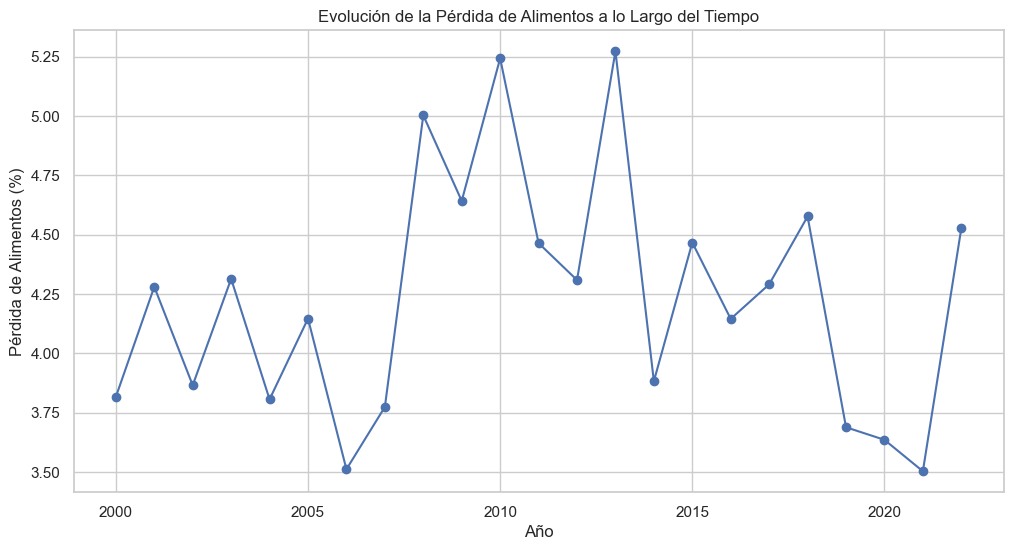

In [97]:
df_food['year'] = pd.to_datetime(df_food['year'], errors='coerce').dt.year
plot_evolucion_perdida_alimentos(df_food, 'year', 'loss_percentage', 'Evolución de la Pérdida de Alimentos a lo Largo del Tiempo', 'Año', 'Pérdida de Alimentos (%)')

### Histograma del Porcentaje de Pérdida
Muestra la distribución del porcentaje de pérdida. Esto ayuda a identificar patrones generales y la presencia de sesgos o outliers.

c:\Users\lauri\anaconda3dg\envs\dhdsML2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


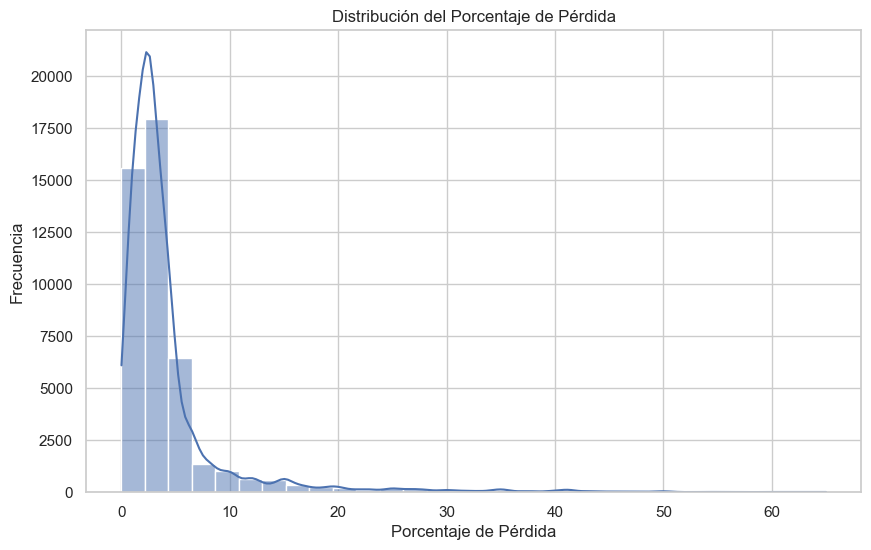

In [98]:
plot_histograma(df_food, 'loss_percentage', 'Distribución del Porcentaje de Pérdida', 'Porcentaje de Pérdida', 'Frecuencia')

### Generar boxplot por país (Top 10 países)
Se compara la distribución del porcentaje de pérdida entre los países más representados en el dataset. 

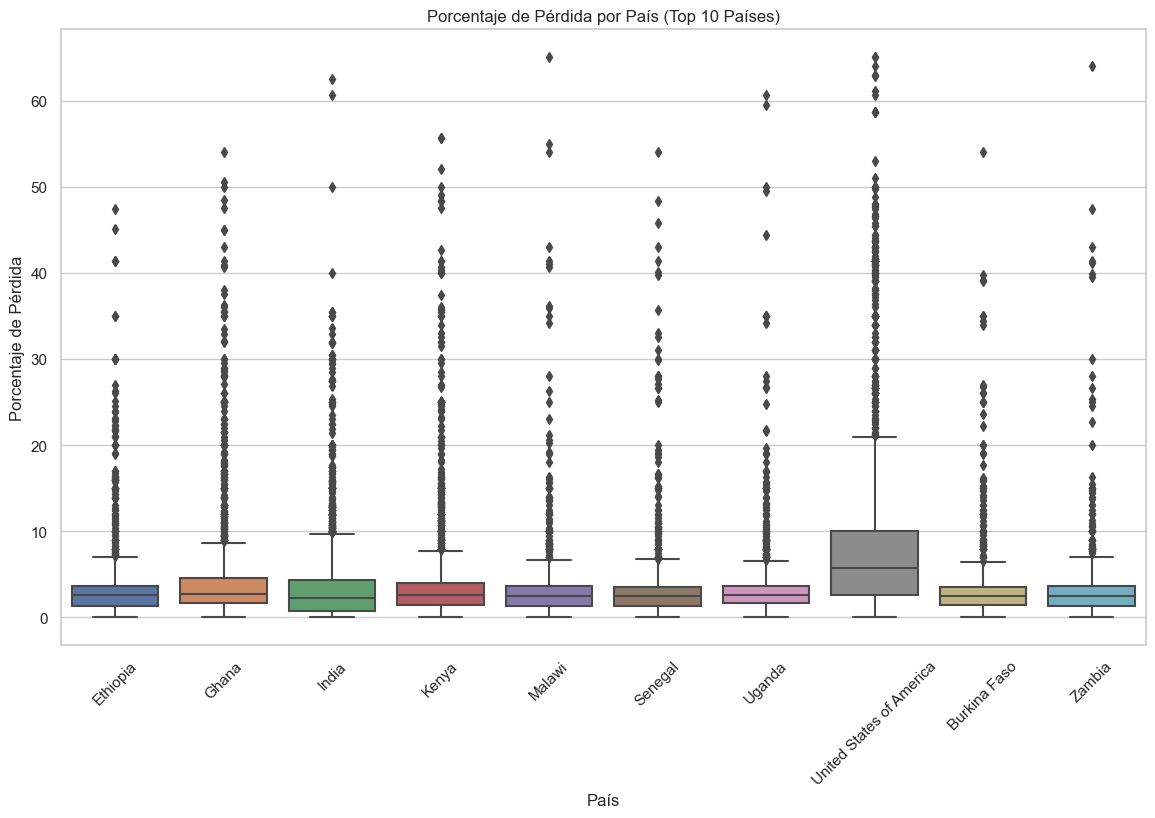

In [99]:
plot_boxplot(df_food, 'country', 'loss_percentage', 'Porcentaje de Pérdida por País (Top 10 Países)', 'País', 'Porcentaje de Pérdida', top_n=10)

### Gráfico de Barras de Actividades de Pérdida (top 10)
Muestra las actividades más comunes donde se registran pérdidas. Identifica las áreas críticas de intervención.

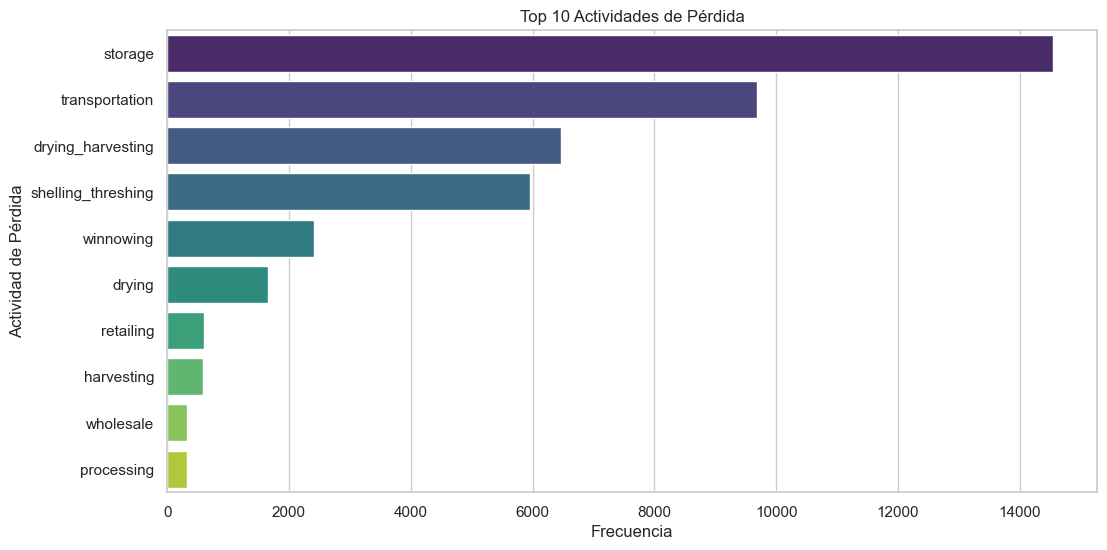

In [100]:
plot_bar(df_food, 'activity', 'Top 10 Actividades de Pérdida', 'Frecuencia', 'Actividad de Pérdida', top_n=10)

### Gráfico de Barras de Etapas de Pérdida
Muestra la frecuencia de pérdidas en diferentes etapas de la cadena de suministro.

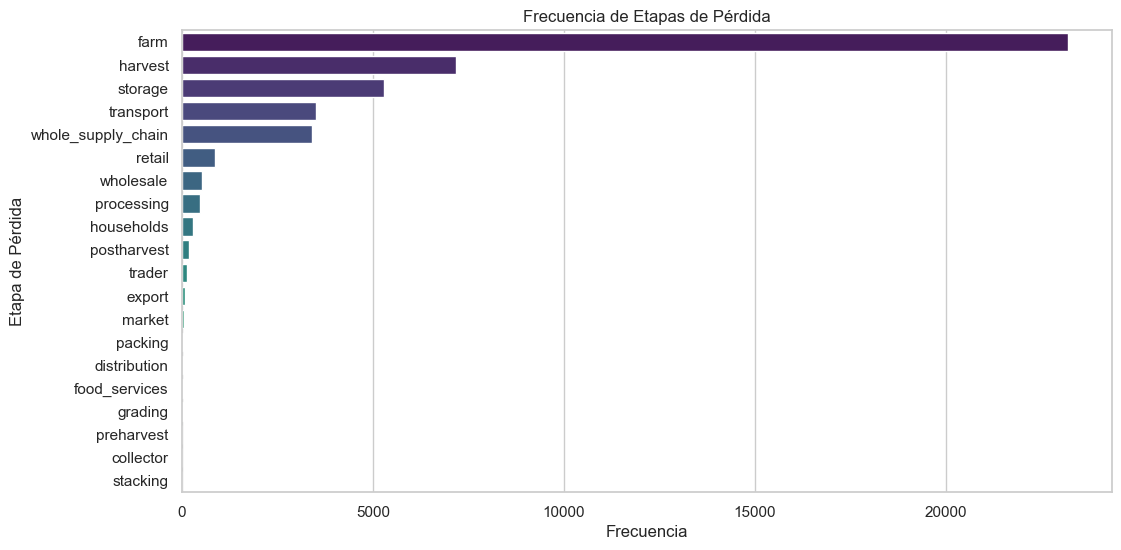

In [101]:
plot_bar(df_food, 'food_supply_stage', 'Frecuencia de Etapas de Pérdida', 'Frecuencia', 'Etapa de Pérdida')

### Diagrama de Dispersión del Porcentaje de Pérdida vs. Año (últimos 10 años)


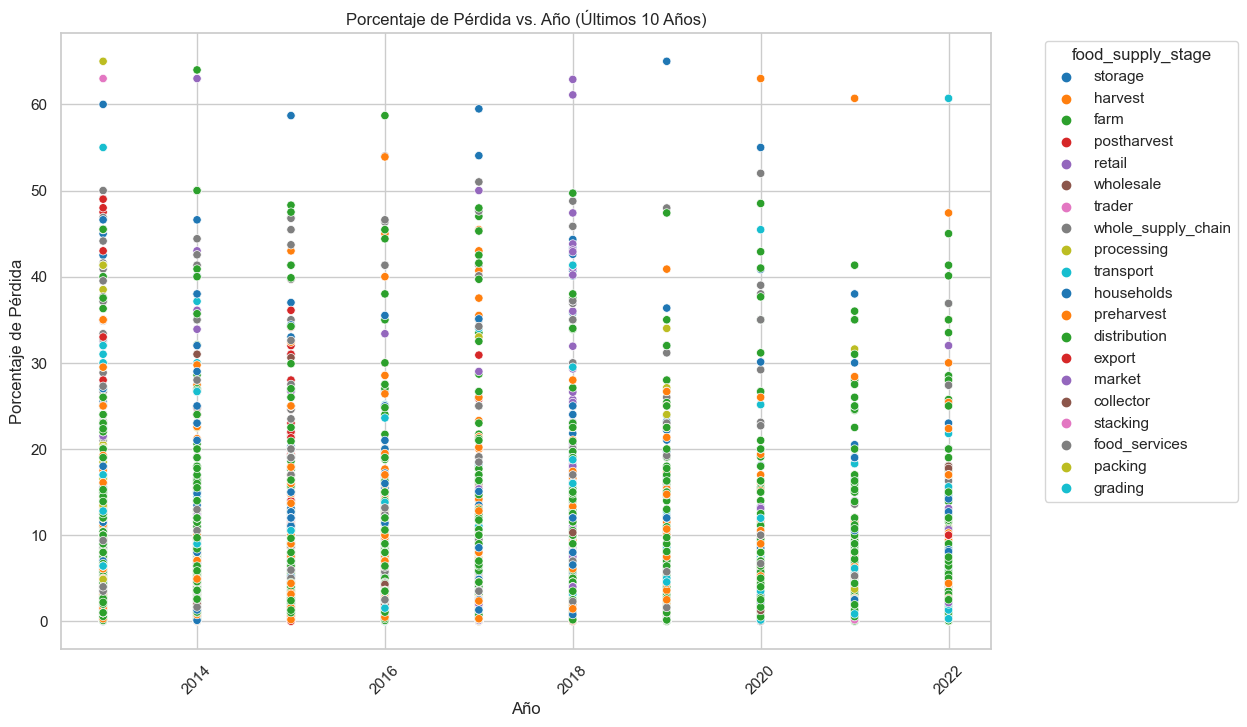

In [102]:
def filtrar_ultimos_10_anios(df, columna_anio):
    df[columna_anio] = pd.to_datetime(df[columna_anio]).dt.year
    anio_max = df[columna_anio].max()
    df_filtrado = df[df[columna_anio] >= anio_max - 9]
    return df_filtrado

df_food_filtrado = filtrar_ultimos_10_anios(df_food, 'periodo')

plot_scatter(df_food_filtrado, 'year', 'loss_percentage', 'food_supply_stage', 'Porcentaje de Pérdida vs. Año (Últimos 10 Años)', 'Año', 'Porcentaje de Pérdida')

### Correlación entre las variables numéricas y el porcentaje de pérdida


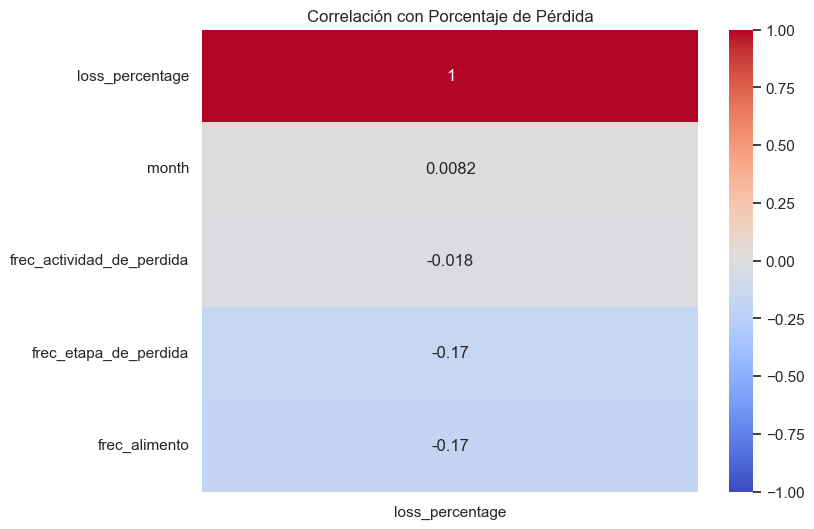

In [103]:
generar_matriz_correlacion_focalizada(df_food, 'loss_percentage', 'Correlación con Porcentaje de Pérdida')

## Conclusiones del Análisis Exploratorio

1. **Tendencia de la pérdida de alimentos por año**
* **Tendencia General:** La pérdida de alimentos fluctúa a lo largo de los años sin una tendencia clara a la disminución o aumento constante. Sin embargo, hay períodos con aumentos significativos y otros con disminuciones notables, es decir, se observan picos y valles:
  - **Picos Importantes:** En 2008, 2010 y 2013 se observan picos significativos en la pérdida de alimentos, que podrían deberse a diversos factores relacionados con eventos económicos, climáticos, políticos y sociales que ocurrieron específicamente esos años. Por ejemplo, en el año 2008 hubo una crisis financiera que tuvo un impacto significativo en la economía mundial y que pudo haber afectado la producción, distribución y consumo de alimentos. Por otro lado, durante los años 2010 y 2013, ocurrieron eventos como el terremoto en Haití, las inundaciones en Pakistán (que destruyeron grandes áreas agrícolas), la ola de calor y los incendios forestales en Rusia (que afectaron gravemente la producción de granos y otros alimentos), las inundaciones en Europa, incluyendo la inundación en el Reino Unido durante el invierno 2023-2014 y el ciclón en India; todos ellos eventos climáticos y desastres ambientales que podrían haber contribuido al aumento observado en la pérdida de alimentos.

2. **Gráfica histograma del Porcentaje de Pérdida**
* **Sesgo a la Derecha:** La mayoría de las pérdidas son bajas, pero hay algunos casos con pérdidas muy altas.
* **Outliers:** Valores extremadamente altos en el histograma sugieren la presencia de outliers, que pueden ser causados por eventos excepcionales o errores en los datos.
* **Variabilidad:** Un rango amplio de porcentajes de pérdida indica una gran variabilidad en las condiciones y prácticas que afectan la pérdida de alimentos.

3. **Gráfica boxplot por país (Top 10 países):**
Se visualiza la distribución del porcentaje de pérdida de alimentos por país, enfocándose en los 10 países **con más datos**. 
* **Distribución General:** 
  * La mayoría de los países presentan una mediana de porcentaje de pérdida entre aproximadamente 2% y 6%.
  * Se observan algunos valores atípicos (outliers) en casi todos los países, indicando que hay ocasiones donde la pérdida es significativamente mayor que el promedio.

4. **Gráfica Barras de Actividades de Pérdida (top 10)**
* La mayoría de las pérdidas ocurren durante el almacenamiento (Storage) y el transporte (transportation), indicando que estas etapas son críticas y que podrían necesitar intervenciones específicas para reducir pérdidas.

5. **Gráfica Barras de Etapas de Pérdida**
* La etapa de granja (Farm) es la más problemática y podría beneficiarse significativamente de mejoras en las prácticas agrícolas y manejo en la misma.
* Las etapas de cosecha (harvest), almacenamiento (storage) y transporte (transport) también son críticas y tienen oportunidades de mejora.

6. **Gráfica Diagrama de Dispersión del Porcentaje de Pérdida vs. Año (ultimos 10 años)**
* Las diferentes etapas de pérdida (Farm, Post-harvest, Distribution, Processing, Storage, Retail, Transport, Packaging) muestran una amplia variabilidad en los porcentajes de pérdida cada año.
* Granja (Farm) y cosecha (harvest) parecen tener algunos de los valores más altos de pérdida en ciertos años.
* Se observan varios outliers en todas las etapas y años, lo que indica que hay eventos o condiciones específicas que resultan en porcentajes de pérdida inusualmente altos.


**Consideraciones para un Modelo de Serie de Tiempo**
* Variabilidad y Outliers: El modelo debe manejar adecuadamente la alta variabilidad y los outliers presentes en los datos. Métodos robustos como el suavizado exponencial o modelos de regresión robusta podrían ser útiles.
* Estacionalidad y Tendencias: Es crucial identificar y modelar cualquier estacionalidad y tendencia en los datos, aunque las tendencias no sean claramente visibles en un análisis simple.
* Desagregación por Etapas: Considerar la desagregación de los datos por etapas de pérdida podría mejorar la capacidad predictiva del modelo, dado que diferentes etapas presentan diferentes patrones de pérdida.

---

# Análisis geoespacial

En esta sección, abordamos el análisis geoespacial de los datos utilizando la librería 'geopandas'. 
Este tipo de análisis nos permite visualizar y entender mejor la distribución geográfica de la pérdida de alimentos, identificando patrones y tendencias que podrían estar ocultos en el análisis que realizamos previamente.

## Preparación de los datos

In [104]:
# Carga de archivo tipo shapefile con información geoespacial
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Formateo de datos de las columnas de país para poder combinar los datasets
world.loc[:, 'name'] = world['name'].apply(clean_format_category)
df_food.loc[:, 'country'] = df_food['country'].apply(clean_format_category)

# Merge de los datos de alimentos con el archivo de formas geográficas usando como clave los países
merged_data = world.merge(df_food, left_on="name", right_on="country")
merged_data.head(3)

C:\Users\lauri\AppData\Local\Temp\ipykernel_19136\861517371.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,country,commodity,year,loss_percentage,activity,food_supply_stage,month,periodo,frec_actividad_de_perdida,frec_etapa_de_perdida,frec_alimento
0,889953.0,Oceania,fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",fiji,tomatoes,2012,13.40,consumption,households,3,2012,163,286,539
1,889953.0,Oceania,fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",fiji,tomatoes,2012,6.40,wholesale,wholesale,11,2012,331,518,539
2,889953.0,Oceania,fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",fiji,tomatoes,2012,0.13,transportation,transport,5,2012,9685,3506,539


In [105]:
# Limpieza de outliers en la variable loss_percentage
merged_data_sin_outliers = clean_outliers(merged_data, "merged_data", ["loss_percentage"])

## Distribución geográfica de la pérdida de alimentos

Visualización de la pérdida porcentual de alimentos para identificar regiones con mayores tasas de desperdicio.

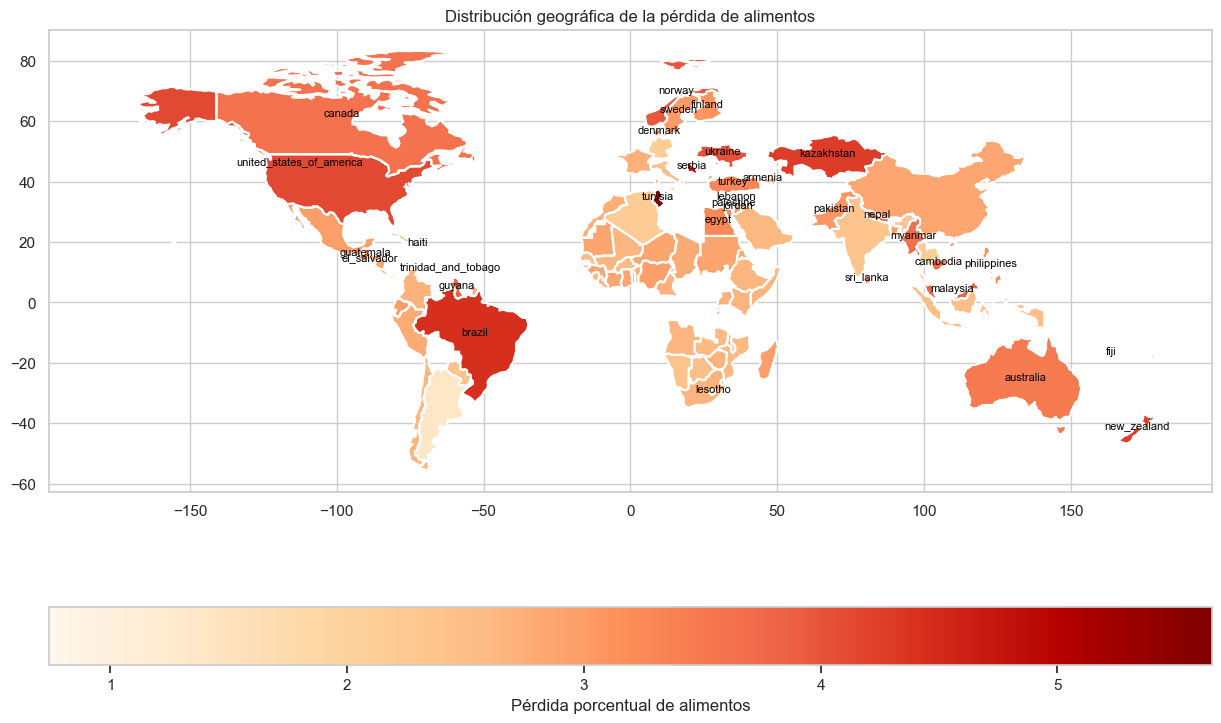

In [106]:
# Se agrupan los datos por país y se calcula la pérdida porcentual promedio
loss_country = merged_data_sin_outliers.groupby("country")["loss_percentage"].mean().reset_index()
loss_country = loss_country.rename(columns={"country":"name"})

# Se crea un DataFrame geoespacial con la pérdida promedio por país
countries = world.dissolve(by="name")
countries = countries.reset_index()
countries = countries.merge(loss_country, on= "name")

# Se filtran los países con pérdida porcentual mayor a 3
countries_high_loss = countries[countries["loss_percentage"] > 3]

# Mapa
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
countries.boundary.plot(ax=ax)
countries.plot(column='loss_percentage', ax=ax, legend=True, cmap='OrRd',
           legend_kwds={'label': "Pérdida porcentual de alimentos",
                        'orientation': "horizontal"})
for idx, row in countries_high_loss.iterrows():
    ax.annotate(text=row['name'], xy=row['geometry'].centroid.coords[0],
                horizontalalignment='center', fontsize=8, color='black')
ax.set_title('Distribución geográfica de la pérdida de alimentos')
plt.show()

En el mapa anterior, podemos ver que países desarrollados como Estados Unidos, Dinamarca, Noruega y Nueva Zelanda muestran porcentajes de pérdida moderados. Estos países probablemente tengan sistemas avanzados de gestión de alimentos, pero el desperdicio podría estar influenciado por patrones de consumo y excedentes. Por otro lado, en países en desarrollo y emergentes como Brasil y Guyana, el desperdicio podría ser una combinación de ineficiencias en la cadena de suministro, infraestructura limitada y falta de políticas efectivas de gestión de alimentos. Los países con porcentajes de pérdida más bajos son muy heterogéneos en cuanto a desarrollo económico, cultura y hábitos alimenticios, e infraestructura y sistemas de gestión. Aunque no se observa un patrón que explique completamente los porcentajes de pérdida de alimentos, el mapa sugiere que no existe un único factor determinante para el desperdicio de alimentos, sino una combinación de factores económicos, culturales, geográficos y de gestión.   

## Análisis de la distribución geográfica de la pérdida de alimentos teniendo en cuenta la representación de los datos

Es posible que, además de lo mencionado anteriormente, las diferencias entre los países en cuanto a desperdicios de alimentos y la ausencia de un patrón específico se deban a las diferencias en la cantidad de datos reportados por los países. A continuación veremos si podemos encontrar un patrón para entender mejor la distribución geográfica de la pérdida de alimentos, teniendo en cuenta la representación de los datos.

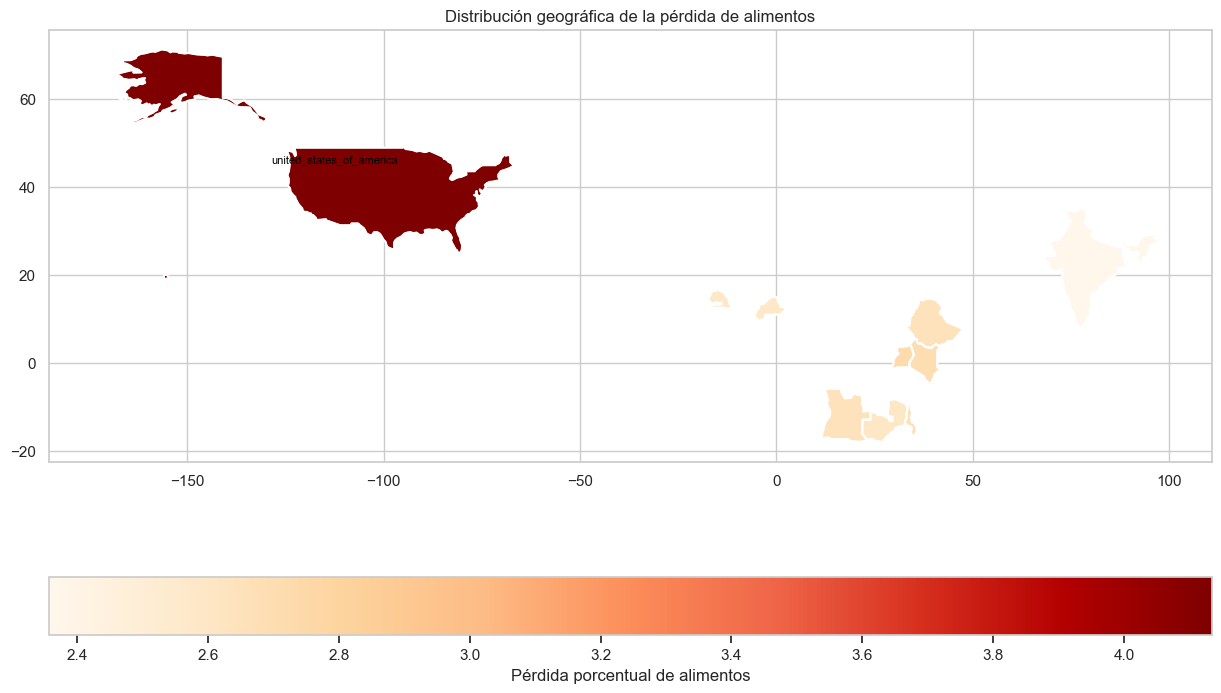

In [107]:
# Top 10 países más representados en el dataset
top_values = merged_data_sin_outliers["country"].value_counts().index[:10]
top_values = merged_data_sin_outliers[merged_data_sin_outliers["country"].isin(top_values)]

# Se agrupan los datos por país y se calcula la pérdida porcentual promedio
loss_top = top_values.groupby("country")["loss_percentage"].mean().reset_index()
loss_top = loss_top.rename(columns={"country":"name"})

# Se crea un DataFrame geoespacial con la pérdida promedio por país
countries = world.dissolve(by="name")
countries = countries.reset_index()
countries = countries.merge(loss_top, on= "name")

# Se filtran los países con pérdida porcentual mayor a 3
countries_high_loss = countries[countries["loss_percentage"] > 3]

# Mapa
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
countries.boundary.plot(ax=ax)
countries.plot(column='loss_percentage', ax=ax, legend=True, cmap='OrRd',
           legend_kwds={'label': "Pérdida porcentual de alimentos",
                        'orientation': "horizontal"})
for idx, row in countries_high_loss.iterrows():
    ax.annotate(text=row['name'], xy=row['geometry'].centroid.coords[0],
                horizontalalignment='center', fontsize=8, color='black')
ax.set_title('Distribución geográfica de la pérdida de alimentos')
plt.show()

Efectivamente, si tenemos en cuenta la cantidad de datos reportados por los países, podemos observar un patrón claro: Estados Unidos es el único país desarrollado representado en el mapa y muestra un porcentaje de pérdida significativamente más alto que el resto. Esto podría estar relacionado con una economía más orientada al consumo, mayores niveles de producción de alimentos y posiblemente mayores excedentes y desperdicios en la cadena de suministro. Los demás países, como Malawi, Uganda, Etiopía, Angola, Kenia, Zambia, Burkina Faso, Senegal e India, son en su mayoría economías en desarrollo o de bajos ingresos y muestran porcentajes de pérdida mucho menores. En estos países, es posibe que los sistemas locales y más pequeños de producción y distribución, además del consumo que suele ser local y personal, contribuyan a reducir las pérdidas. Por otro lado, la diferencia significativa entre Estados Unidos y los países en desarrollo puede también reflejar diferencias culturales en cuanto al desperdicio de alimentos. En los países en desarrollo hay una mayor valoración y uso eficiente de los alimentos debido a la escasez y necesidad económica, mientras que en Estados Unidos, aunque hay esfuerzos por reducir el desperdicio, el alto nivel de consumo y producción puede llevar a mayores niveles de pérdida.   

## Análisis por continente

Se examina la pérdida de alimentos por continente para ver si hay patrones específicos que puedan ser útiles para análisis más detallados.

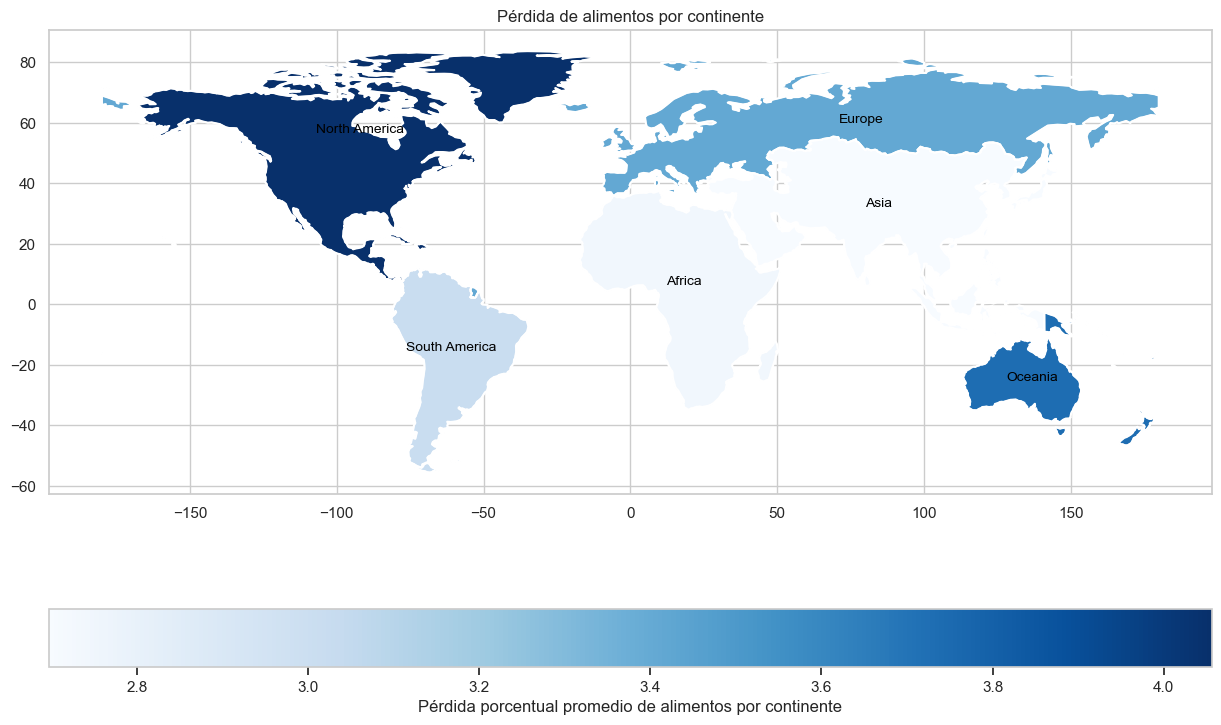

In [108]:
# Se agrupan los datos por continente y se calcula la pérdida porcentual promedio
loss_continent = merged_data_sin_outliers.groupby("continent")["loss_percentage"].mean().reset_index()

# Se crea un DataFrame geoespacial con la pérdida promedio por continente
continents = world.dissolve(by="continent")
continents = continents.reset_index()
continents = continents.merge(loss_continent, on= "continent")

# Mapa
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
continents.boundary.plot(ax=ax)
continents.plot(column='loss_percentage', ax=ax, legend=True, cmap='Blues',
                legend_kwds={'label': "Pérdida porcentual promedio de alimentos por continente",
                             'orientation': "horizontal"})
for idx, row in continents.iterrows():
    ax.annotate(text=row['continent'], xy=row['geometry'].centroid.coords[0],
                horizontalalignment='center', fontsize=10, color='black')                             
ax.set_title('Pérdida de alimentos por continente')
plt.show()

En el mapa anterior se pueden identificar ciertos patrones:
* **Nivel de desarrollo económico:** los continentes con economías más desarrolladas (América del Norte, Europa, Oceanía) tienden a tener mayores porcentajes de desperdicio de alimentos debido a, como mencionamos anteriormente, patrones de consumo elevados y alta producción industrial.
* **Infraestructura y sistemas de distribución:** continentes con infraestructuras más avanzadas pueden tener mayores desperdicios debido a la sobreproducción y problemas en la gestión de excedentes.
* **Prácticas agrícolas y culturales:** en África y Asia, las prácticas agrícolas más locales y tradicionales, junto con una cultura de minimización del desperdicio, resultan en porcentajes más bajos de pérdidas de alimentos.
* **Políticas y conciencia pública:** Europa muestra la efectividad de políticas más estrictas y una mayor conciencia pública sobre el desperdicio de alimentos, aunque el desarrollo económico todavía contribuye a un porcentaje notable de pérdida. 

## Conclusión del análisis geoespacial
La interpretación de los mapas resalta la complejidad del desperdicio de alimentos, influenciado por una mezcla de factores como el desarrollo económico, infraestructura, prácticas agrícolas y culturales, y políticas alimentarias. 
Las estrategias para reducir el desperdicio deberían considerar estos factores contextuales para ser efectivas.

---

## Tratamiento de los datos posterior al análisis

Del dataset original, decidimos centrarnos únicamente en los datos de Estados Unidos. Tras realizar varios análisis, concluimos que esta era la mejor decisión, ya que incluir datos de todos los demás países añadía una mayor variabilidad que podría complicar la precisión de nuestro modelo. Al enfocar el análisis en Estados Unidos, pudimos reducir la heterogeneidad de los datos y obtener resultados más consistentes y manejables para nuestro estudio.

In [109]:
datos_final_EEUU = df_food_copy[df_food_copy['country'] == 'United States of America'] 
datos_final_EEUU.shape

(2694, 11)

In [111]:
#Top 10 alimentos con mayores pérdidas registradas en USA
perdida_promedio = datos_final_EEUU.groupby("commodity")["loss_percentage"].mean()
top_perdidas = perdida_promedio.sort_values(ascending=False).head(10)
top_perdidas

commodity
snails_fresh_chilled_frozen_dried_salted_or_in_brine_except_sea_snails    50.000000
grapefruit_juice                                                          40.031886
orange_juice                                                              38.476200
pineapple_juice                                                           35.237074
canned_mushrooms                                                          34.000000
mustard_seed                                                              32.024000
areca_nuts                                                                30.850000
apple_juice                                                               24.332651
mixed_grain                                                               20.000000
meat_of_cattle_with_the_bone_fresh_or_chilled                             18.750000
Name: loss_percentage, dtype: float64

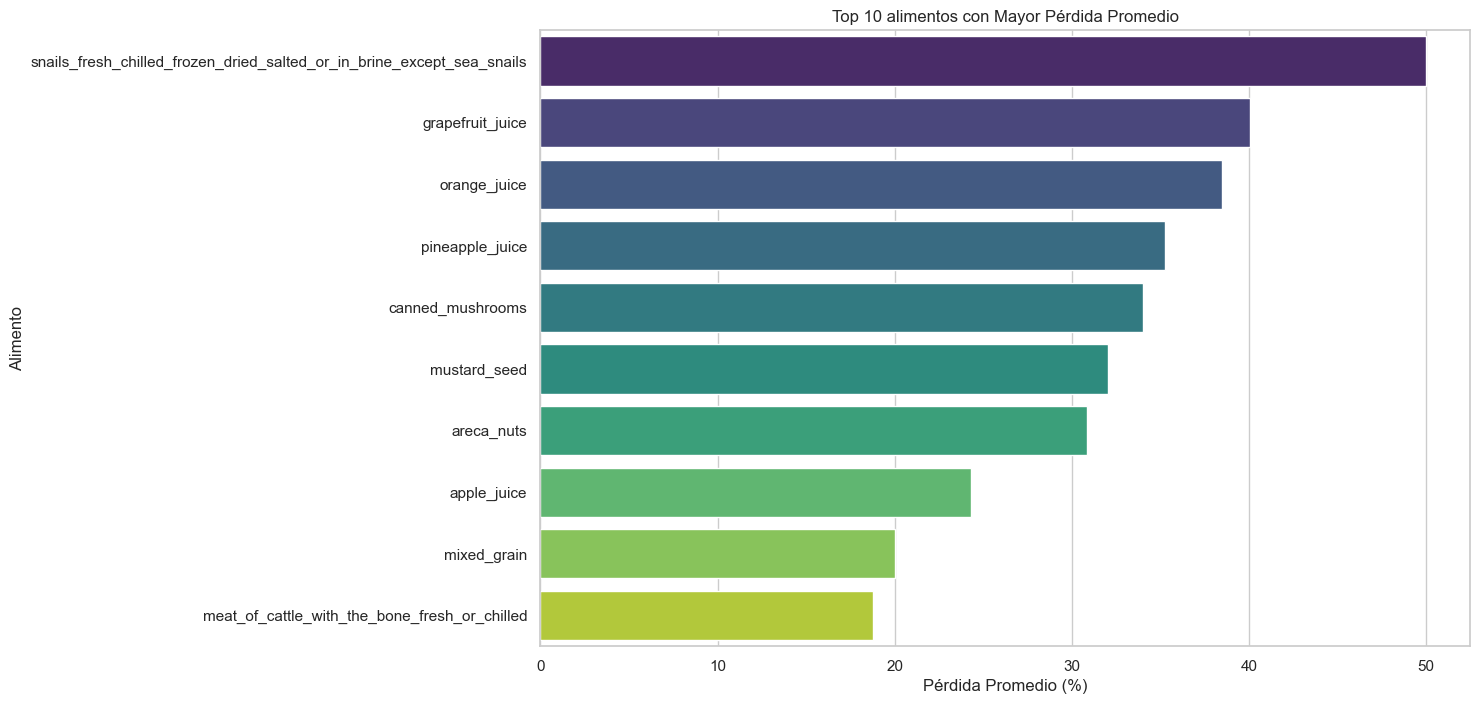

In [117]:
#Barplot top 10 alimentos con mayores pérdidas
plt.figure(figsize=(12, 8))
sns.barplot(x=top_perdidas.values, y=top_perdidas.index, palette='viridis')
plt.title('Top 10 alimentos con Mayor Pérdida Promedio')
plt.xlabel('Pérdida Promedio (%)')
plt.ylabel('Alimento')
plt.show()

In [113]:
# Porcentaje de pérdida de alimentos promedio por año en USA
perdida_anual_usa = datos_final_EEUU.groupby(["year"])["loss_percentage"].mean()
perdida_anual_usa = perdida_anual_usa.reset_index()
perdida_anual_usa

,year,loss_percentage
0,2000-01-01,7.725603
1,2001-01-01,7.027596
2,2002-01-01,6.977829
3,2003-01-01,7.175990
4,2004-01-01,7.035917
5,2005-01-01,9.424045
6,2006-01-01,10.161537
7,2007-01-01,8.168873
8,2008-01-01,14.304435
9,2009-01-01,7.542950


c:\Users\lauri\anaconda3dg\envs\dhdsML2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lauri\anaconda3dg\envs\dhdsML2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


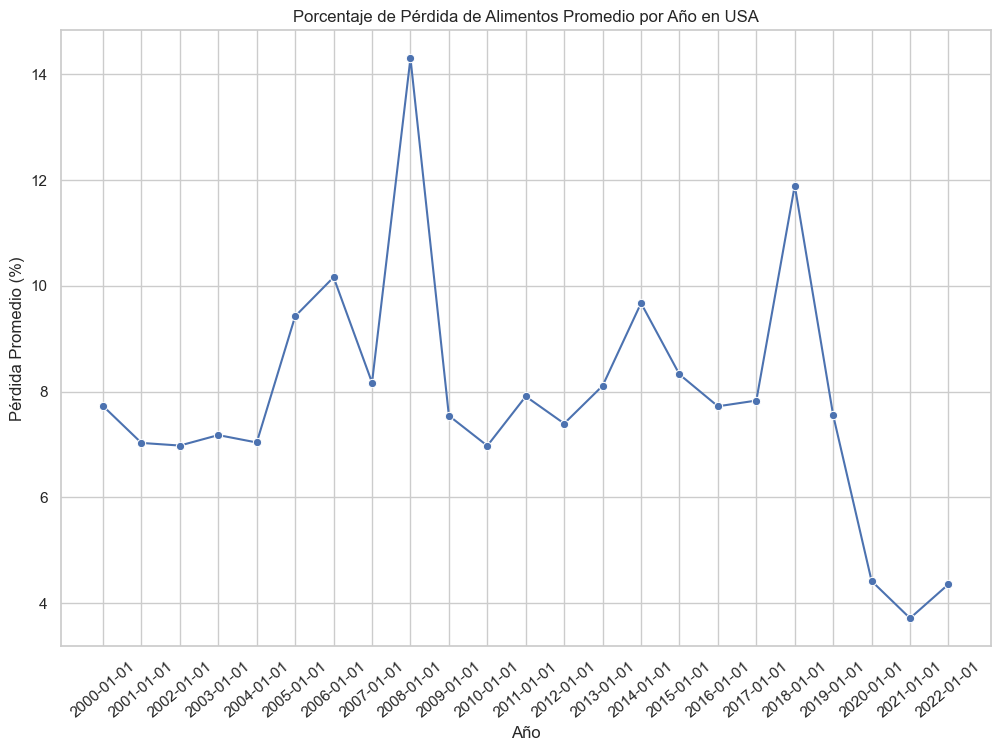

In [120]:
#Lineplot porcentaje de pérdida promedio de alimentos por año
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='loss_percentage', data=perdida_anual_usa, marker='o')
plt.title('Porcentaje de Pérdida Promedio de Alimentos por Año en USA')
plt.xlabel('Año')
plt.ylabel('Pérdida Promedio (%)')
plt.xticks(rotation=40)
plt.grid(True)
plt.show()

In [123]:
# Top 10 Pérdida promedio por actividad en USA
perdida_act_usa = datos_final_EEUU.groupby("activity")["loss_percentage"].mean()
perdida_act_usa_df = perdida_act_usa.reset_index()
perdida_act_usa_df = perdida_act_usa_df.loc[perdida_act_usa_df.groupby("activity")["loss_percentage"].idxmax()]
top_perdida = perdida_act_usa_df.sort_values(by= "loss_percentage", ascending=False).head(10)
top_perdida

,activity,loss_percentage
6,consumption_retailing,23.061532
24,retailing,14.858628
5,consumption,14.776675
21,packaging,10.750000
18,layering,10.000000
29,storage,9.091639
26,sorting,7.075000
13,grading_sorting,6.845876
28,stacking,6.420000
9,drying_harvesting,5.651486


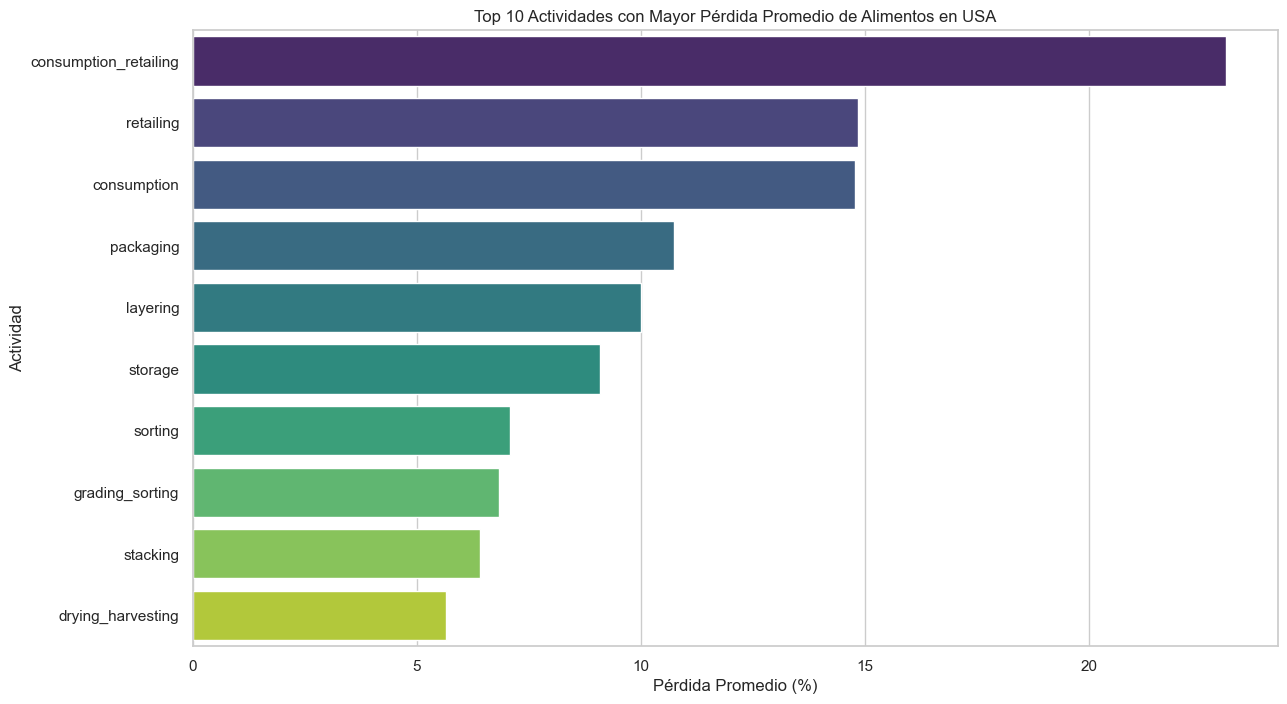

In [124]:
#Barplot Top 10 pérdida por actividad
plt.figure(figsize=(14, 8))
sns.barplot(x='loss_percentage', y='activity', data=top_perdida, palette='viridis')
plt.title('Top 10 Actividades con Mayor Pérdida Promedio de Alimentos en USA')
plt.xlabel('Pérdida Promedio (%)')
plt.ylabel('Actividad')
plt.show()

In [127]:
# Top 10 Pérdida promedio por etapa en USA
perdida_etapa_usa = datos_final_EEUU.groupby("food_supply_stage")["loss_percentage"].mean()
perdida_etapa_usa_df = perdida_etapa_usa.reset_index()
perdida_etapa_usa_df = perdida_etapa_usa_df.loc[perdida_etapa_usa_df.groupby("food_supply_stage")["loss_percentage"].idxmax()]
top_etapa = perdida_etapa_usa_df.sort_values(by= "loss_percentage", ascending=False).head(10)
top_etapa

,food_supply_stage,loss_percentage
4,households,22.311037
8,retail,14.609506
12,whole_supply_chain,9.302833
9,storage,5.255651
1,farm,4.445959
7,processing,4.431694
3,harvest,4.405947
11,transport,4.320345
13,wholesale,3.624155
5,postharvest,3.000000


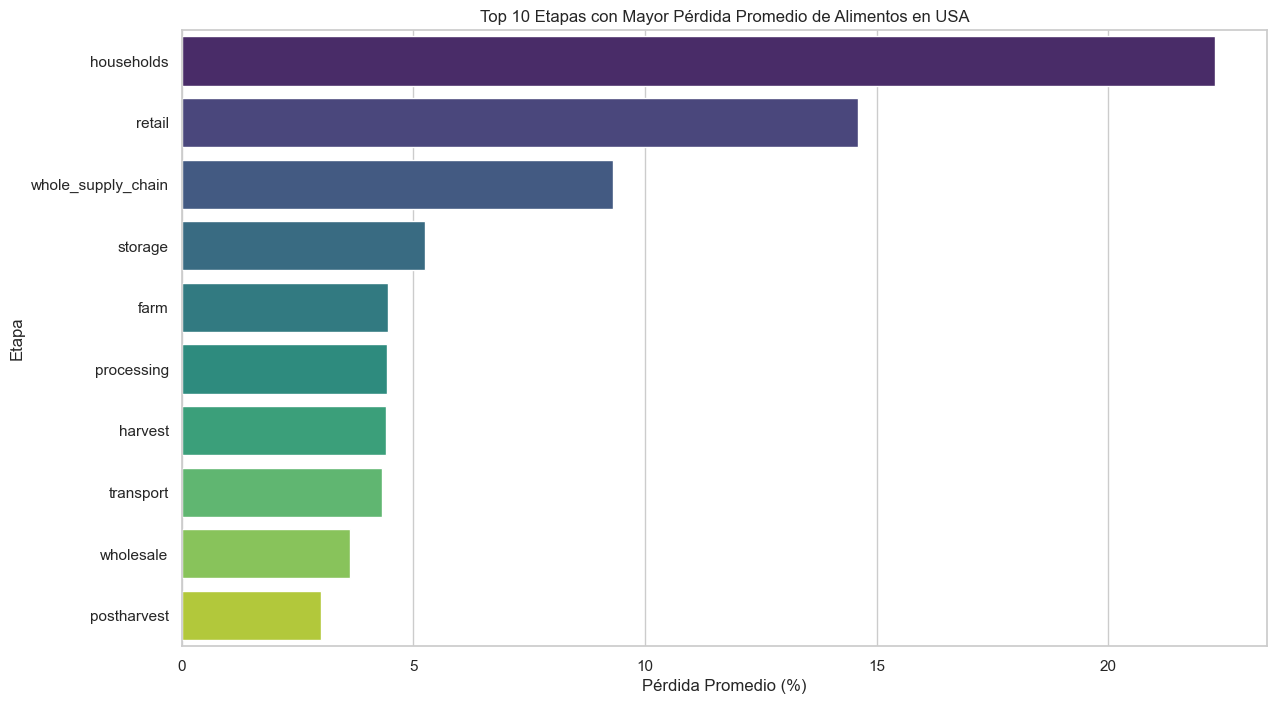

In [129]:
#Barplot top 10 pérdida promedio de alimentos por etapa
plt.figure(figsize=(14, 8))
sns.barplot(x='loss_percentage', y='food_supply_stage', data=top_etapa, palette='viridis')
plt.title('Top 10 Etapas con Mayor Pérdida Promedio de Alimentos en USA')
plt.xlabel('Pérdida Promedio (%)')
plt.ylabel('Etapa')
plt.show()

In [116]:
#Exportación de dataset
datos_final_EEUU.to_csv("datos_final_EEUU_.csv")

## Continua en la notebook "3_Modelamiento.ipynb"